In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.core import arange

#os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/Merians_db/tangos_data1.db'
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data/MerianSIDM/MerianSIDM.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/MerianSIDM/'
#load tangos database

#make sure to only load tangos after setting environment variable otherwise it will see nothing
import tangos
import pynbody
#export TANGOS_DB_CONNECTION=/home/bk639/Merians_db/tangos_data.db
# set the environment variable

sims = tangos.all_simulations()
print(sims)

[<Simulation("r431.romulus25.3072g1HsbBH")>, <Simulation("r431.romulus25cvdXsec.3072g1HsbBH")>, <Simulation("r468.romulus25.3072g1HsbBH")>, <Simulation("r468.romulus25si2s50v35")>, <Simulation("r488.romulus25.3072g1HsbBH")>, <Simulation("r488.romulus25si2s50v35")>, <Simulation("r492.romulus25.3072g1HsbBH")>, <Simulation("r492.romulus25cvdXsec.3072g1HsbBH")>, <Simulation("r492.romulus25si2s50v35")>, <Simulation("r523.romulus25.3072g1HsbBH")>, <Simulation("r523.romulus25si2s50v35")>, <Simulation("r544.romulus25.3072g1HsbBH")>, <Simulation("r544.romulus25si2s50v35")>, <Simulation("r597.romulus25.3072g1HsbBH")>, <Simulation("r597.romulus25si2s50v35")>, <Simulation("r618.romulus25.3072g1HsbBH")>, <Simulation("r618.romulus25si2s50v35")>, <Simulation("r634.romulus25.3072g1HsbBH")>, <Simulation("r634.romulus25si2s50v35")>]


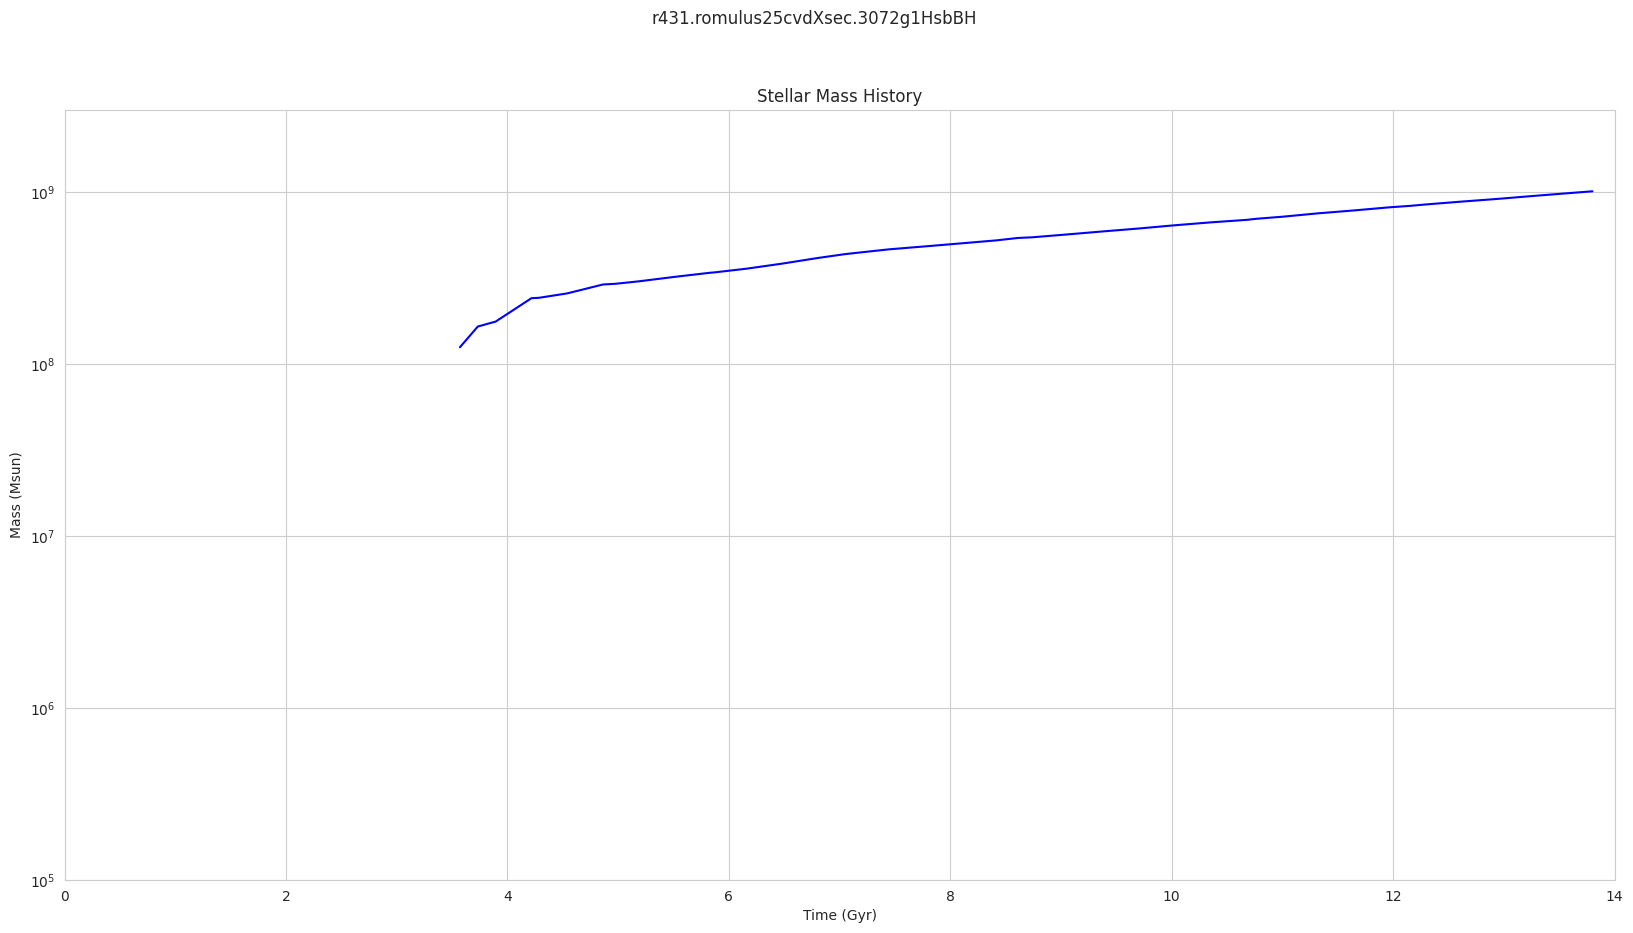

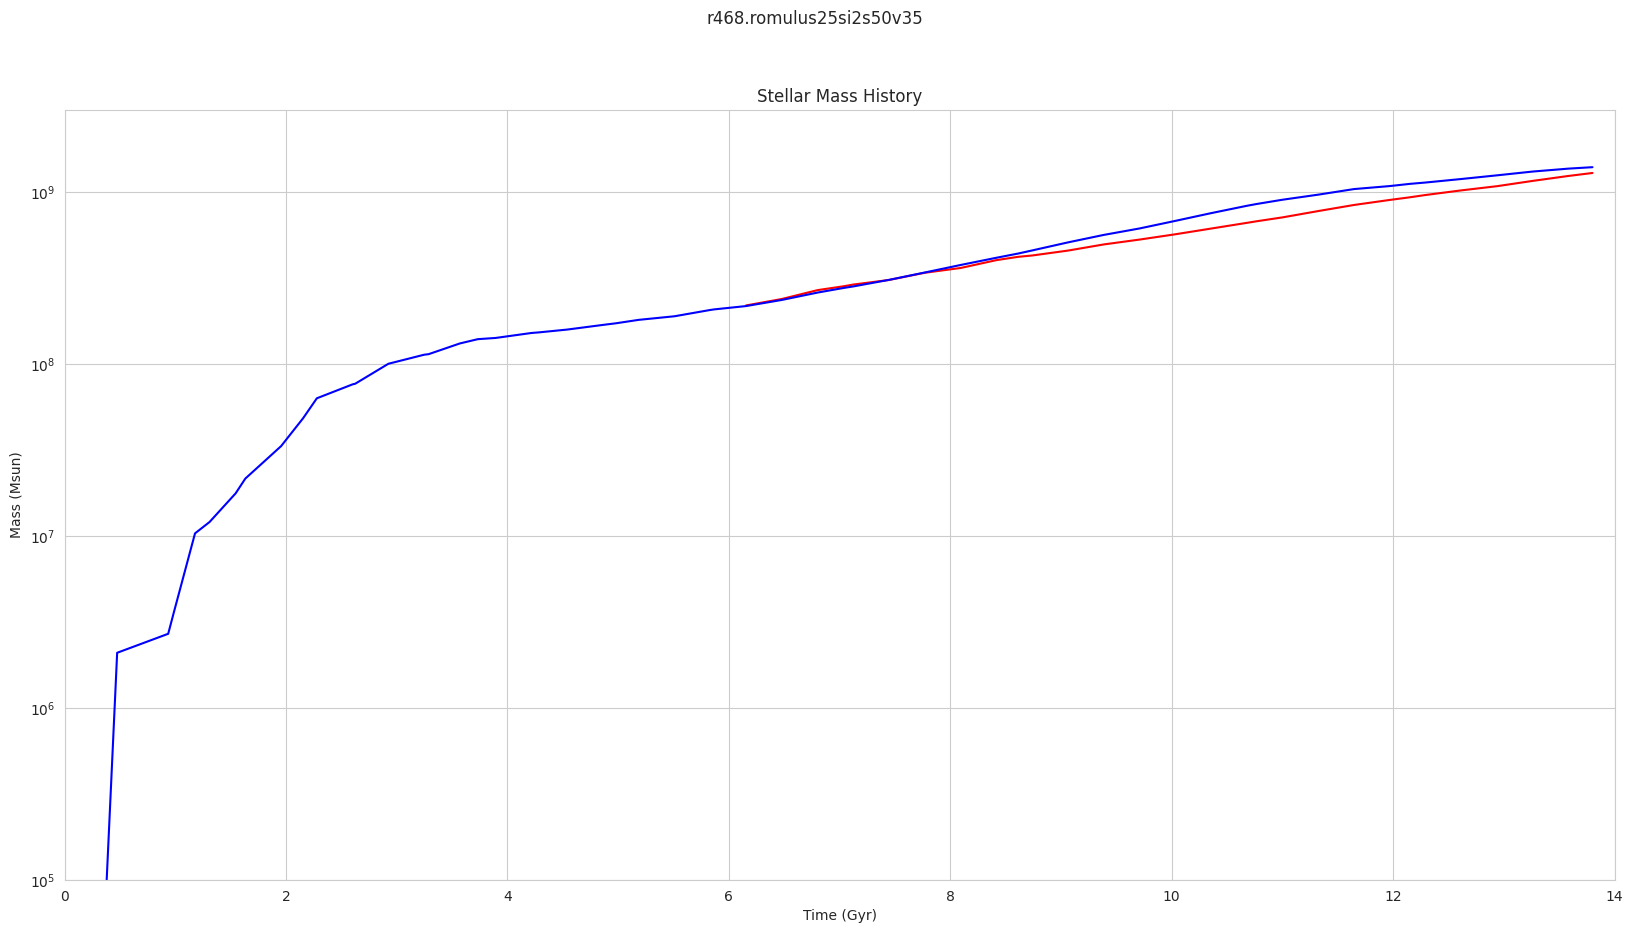

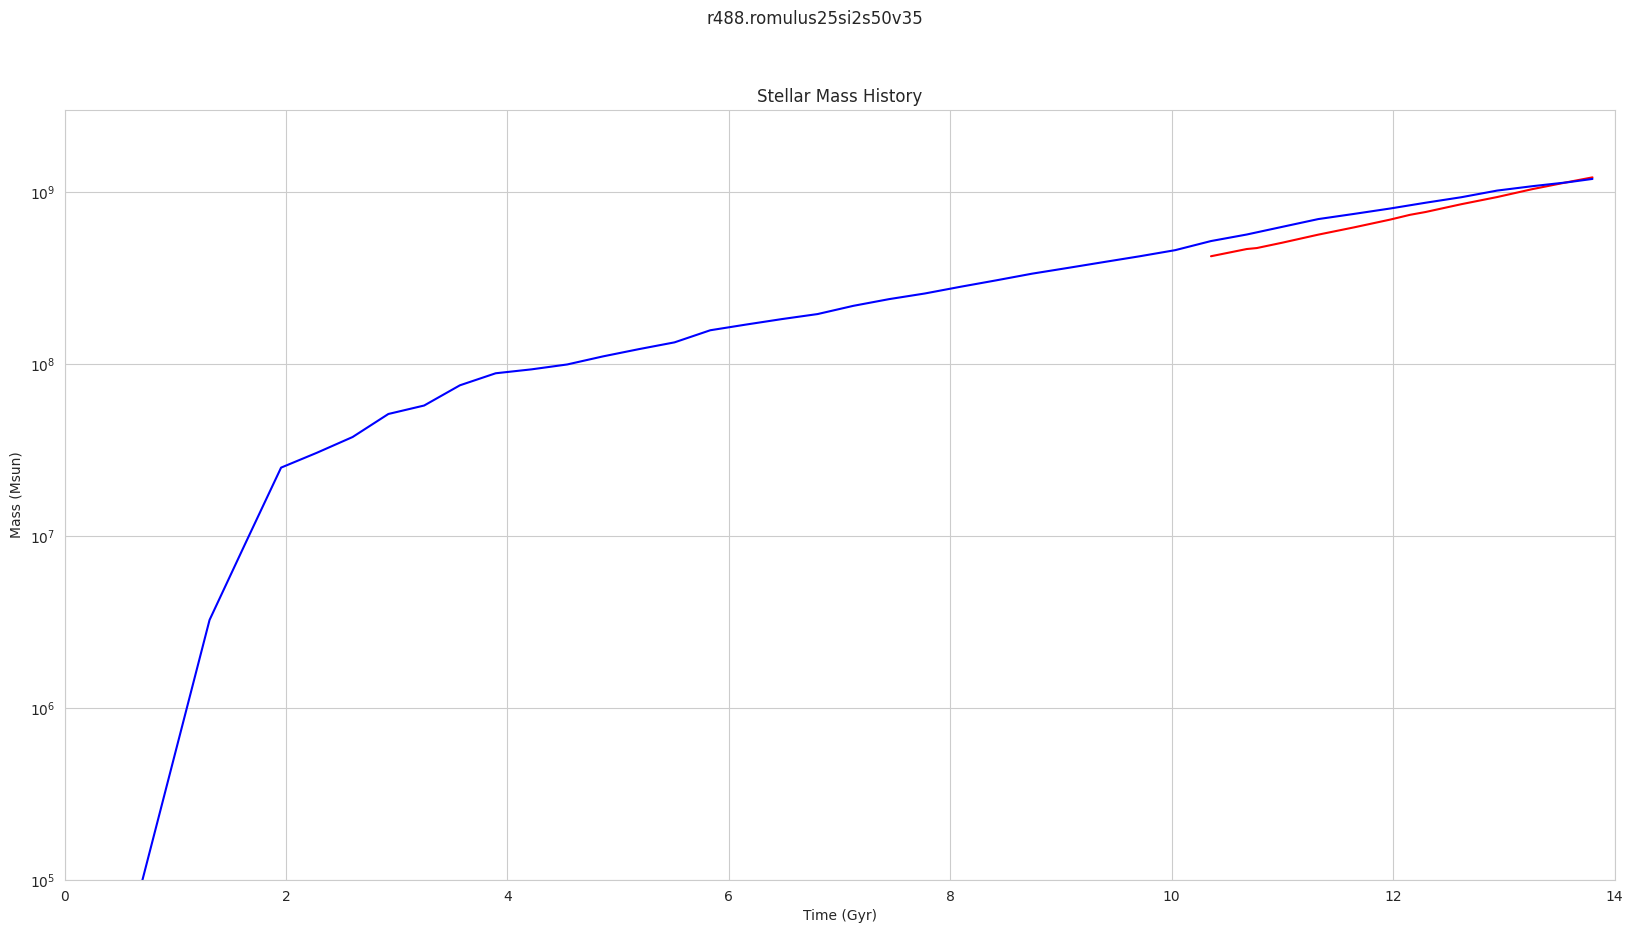

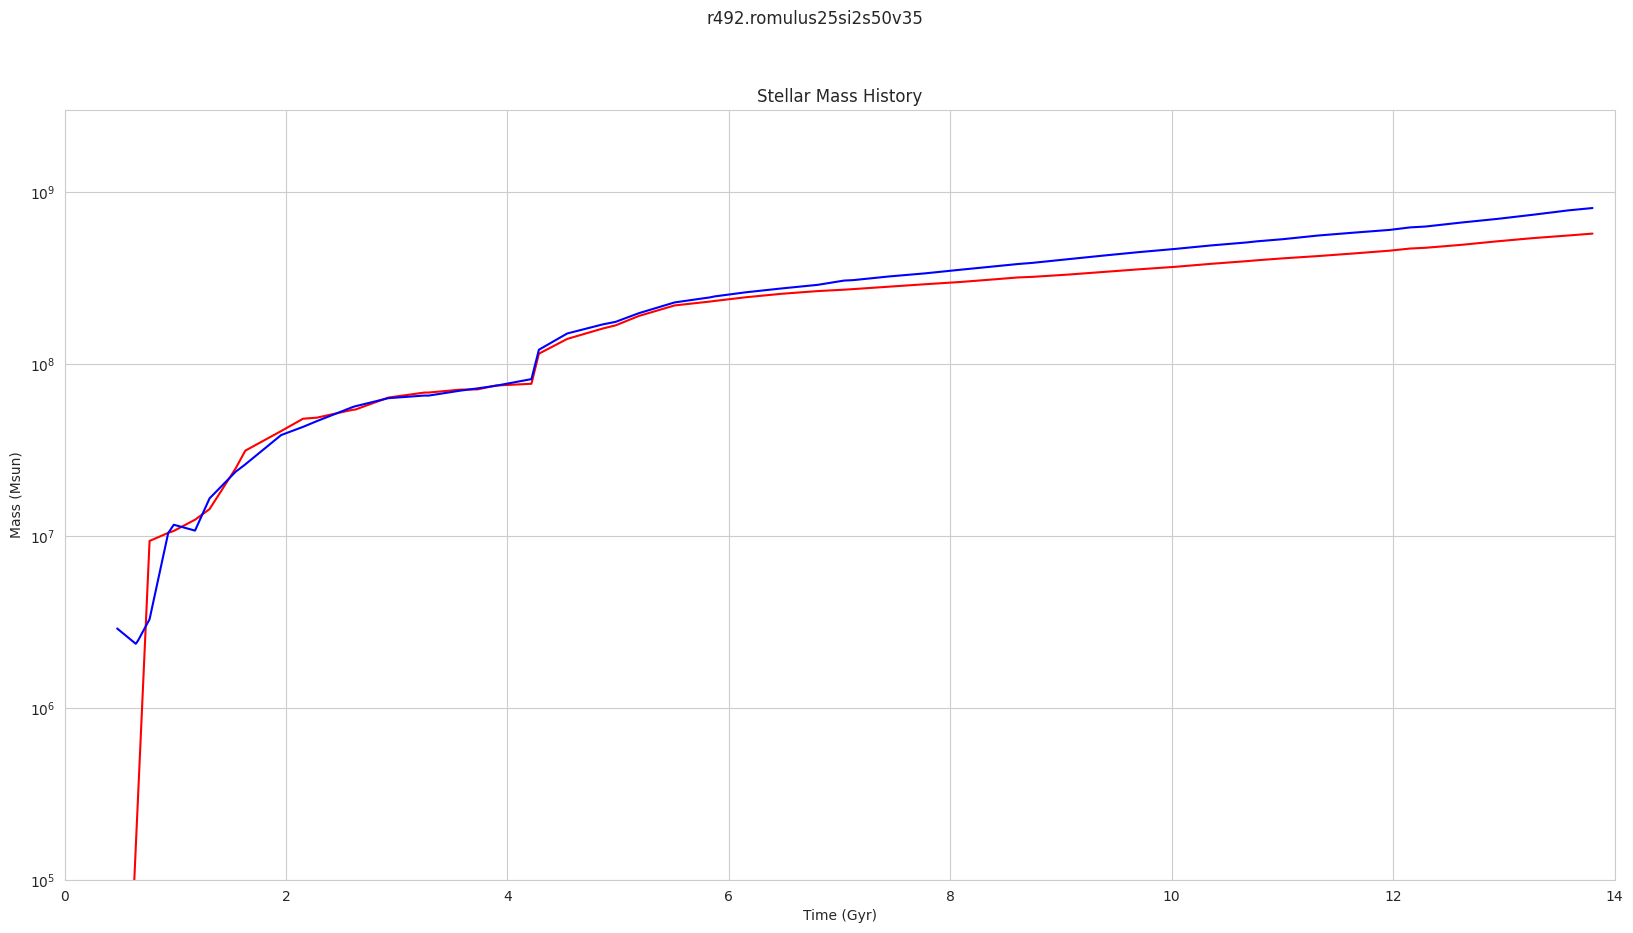

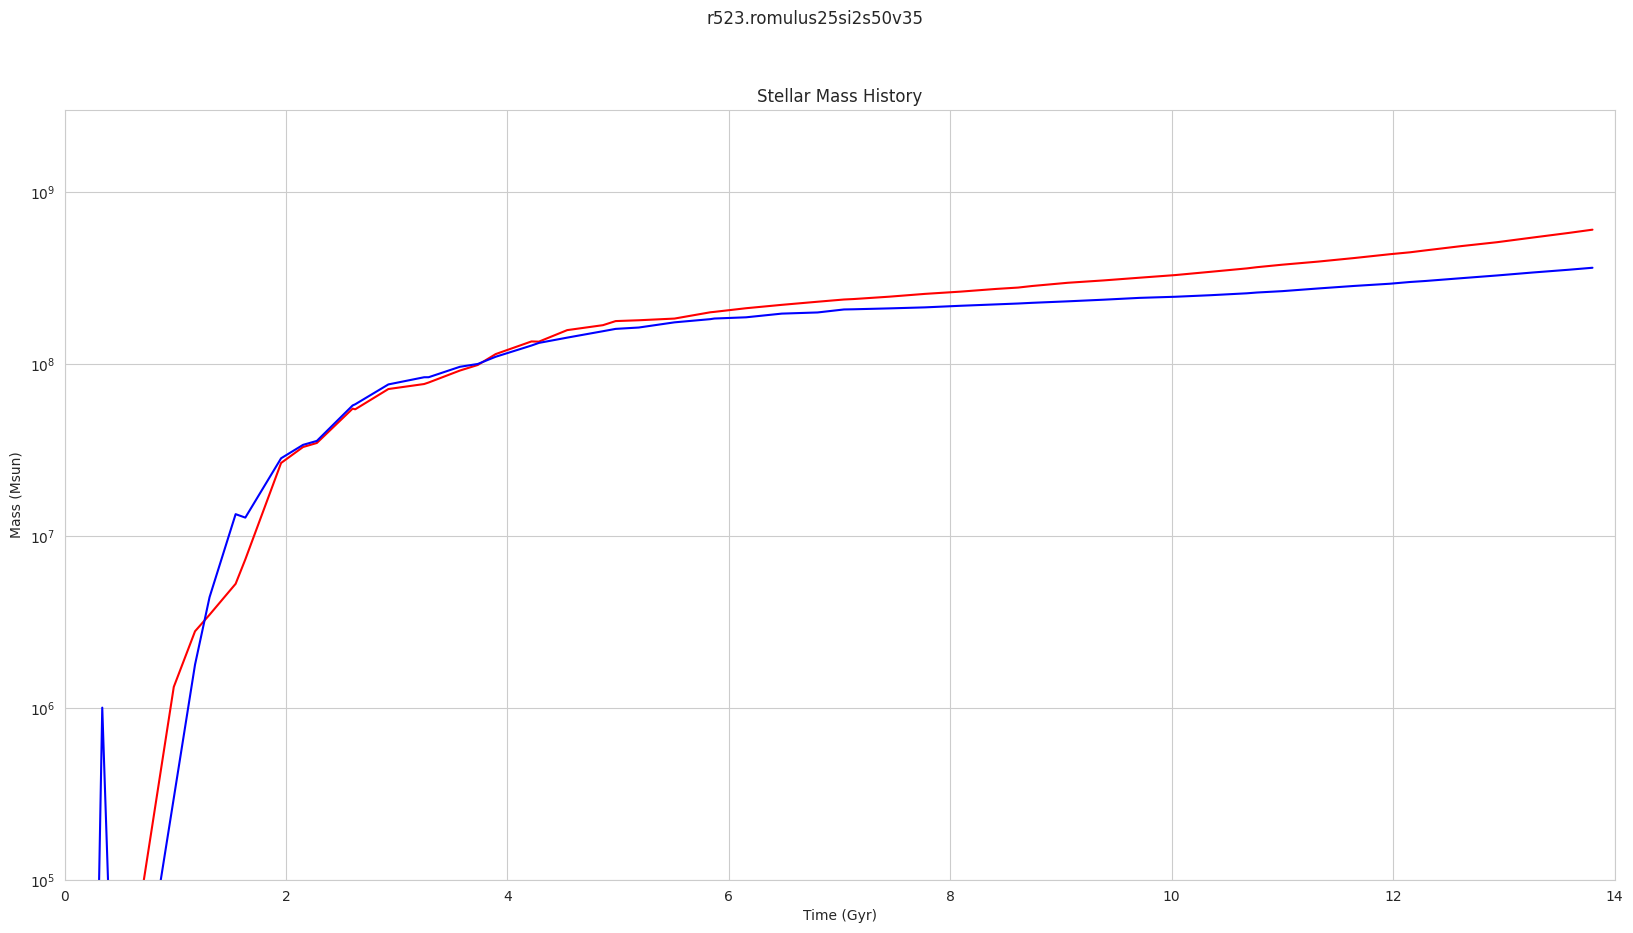

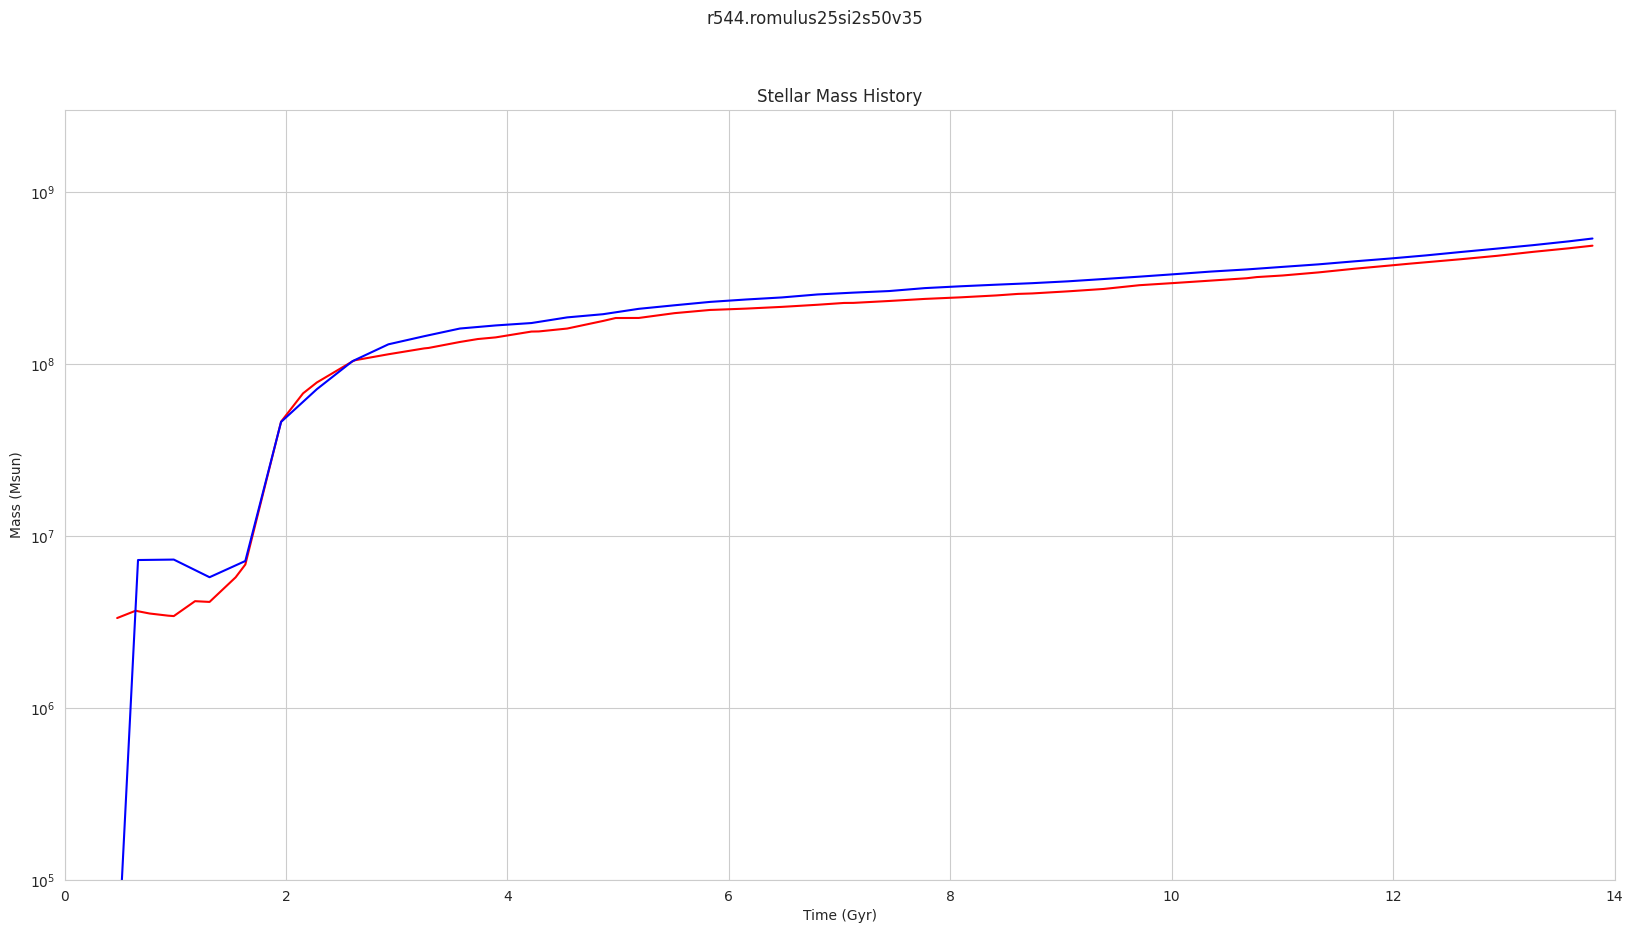

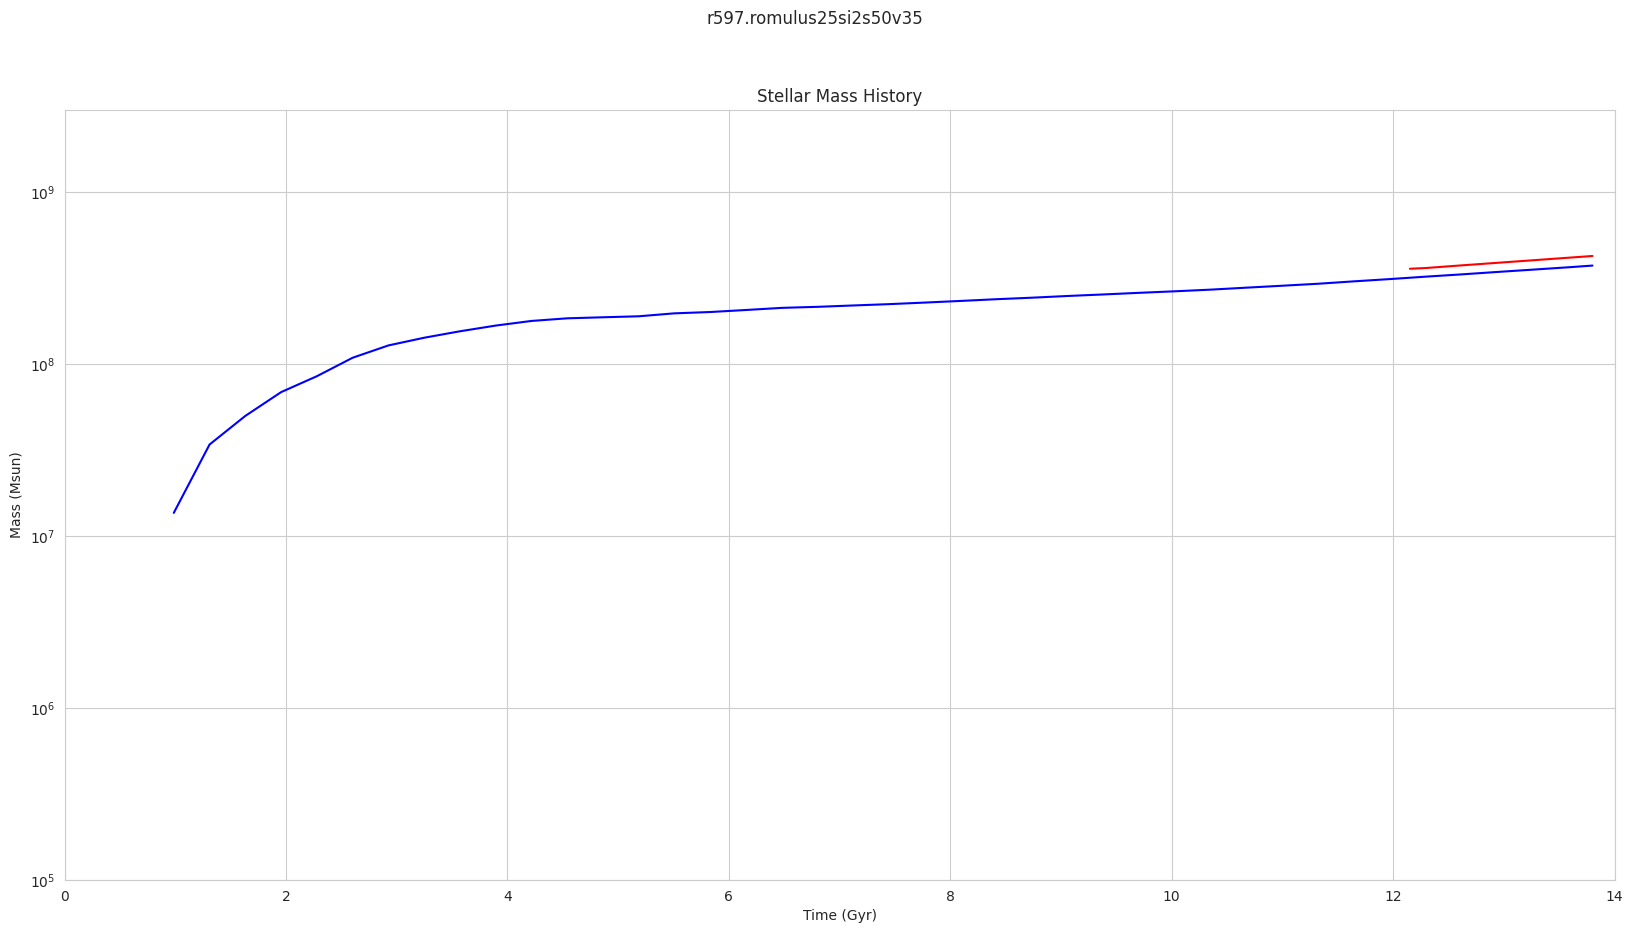

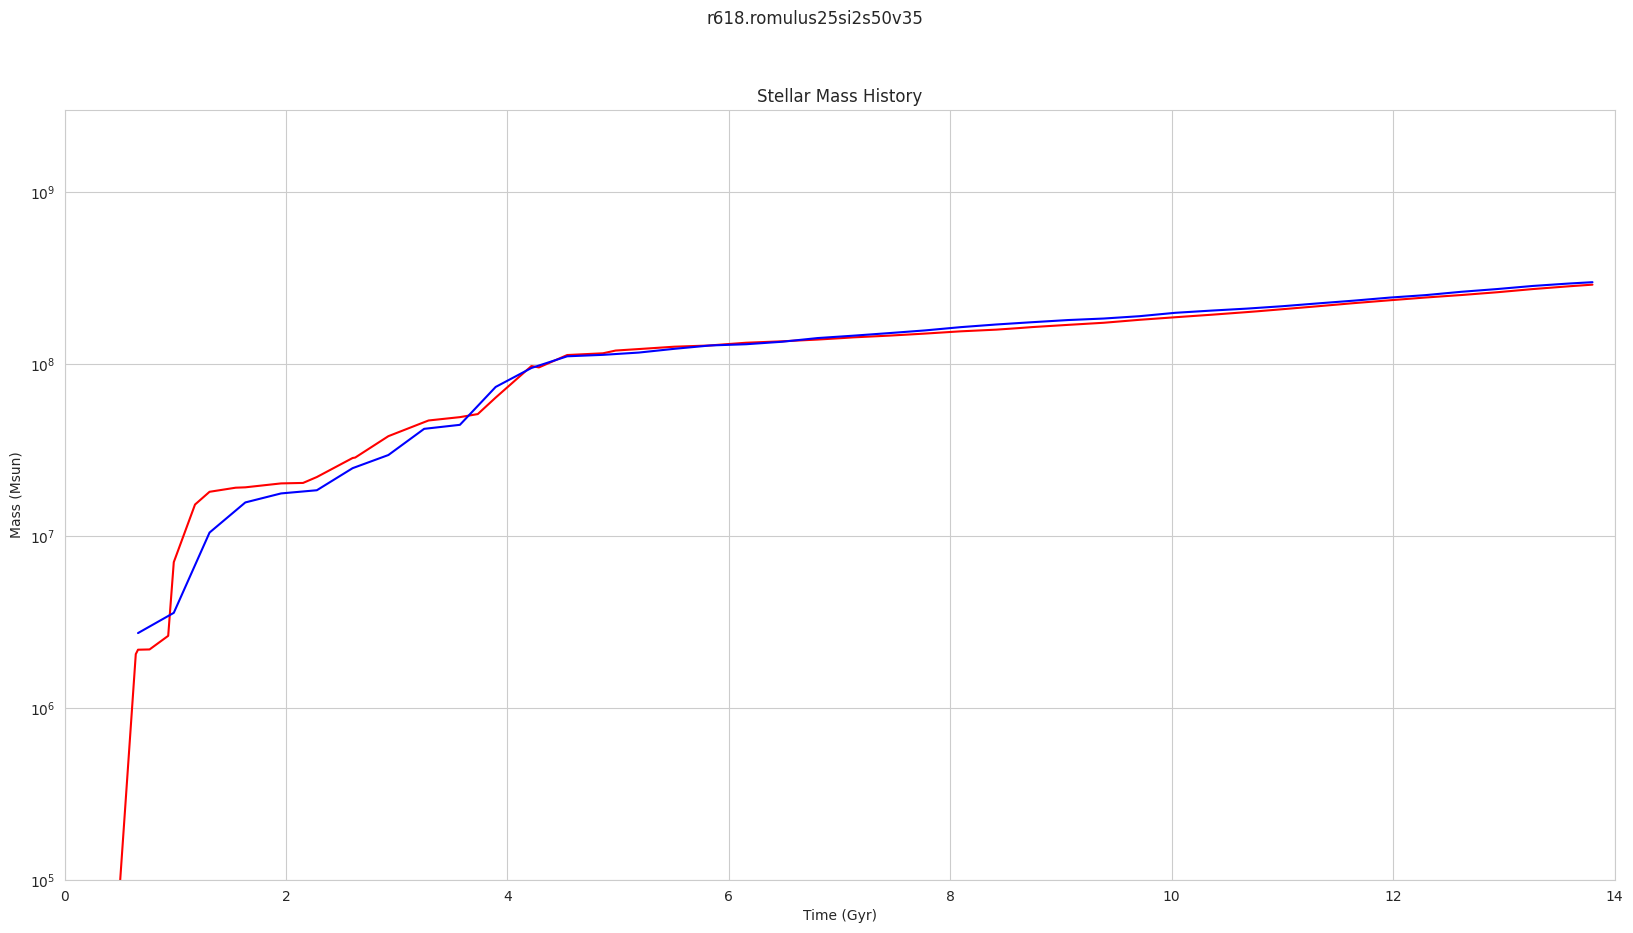

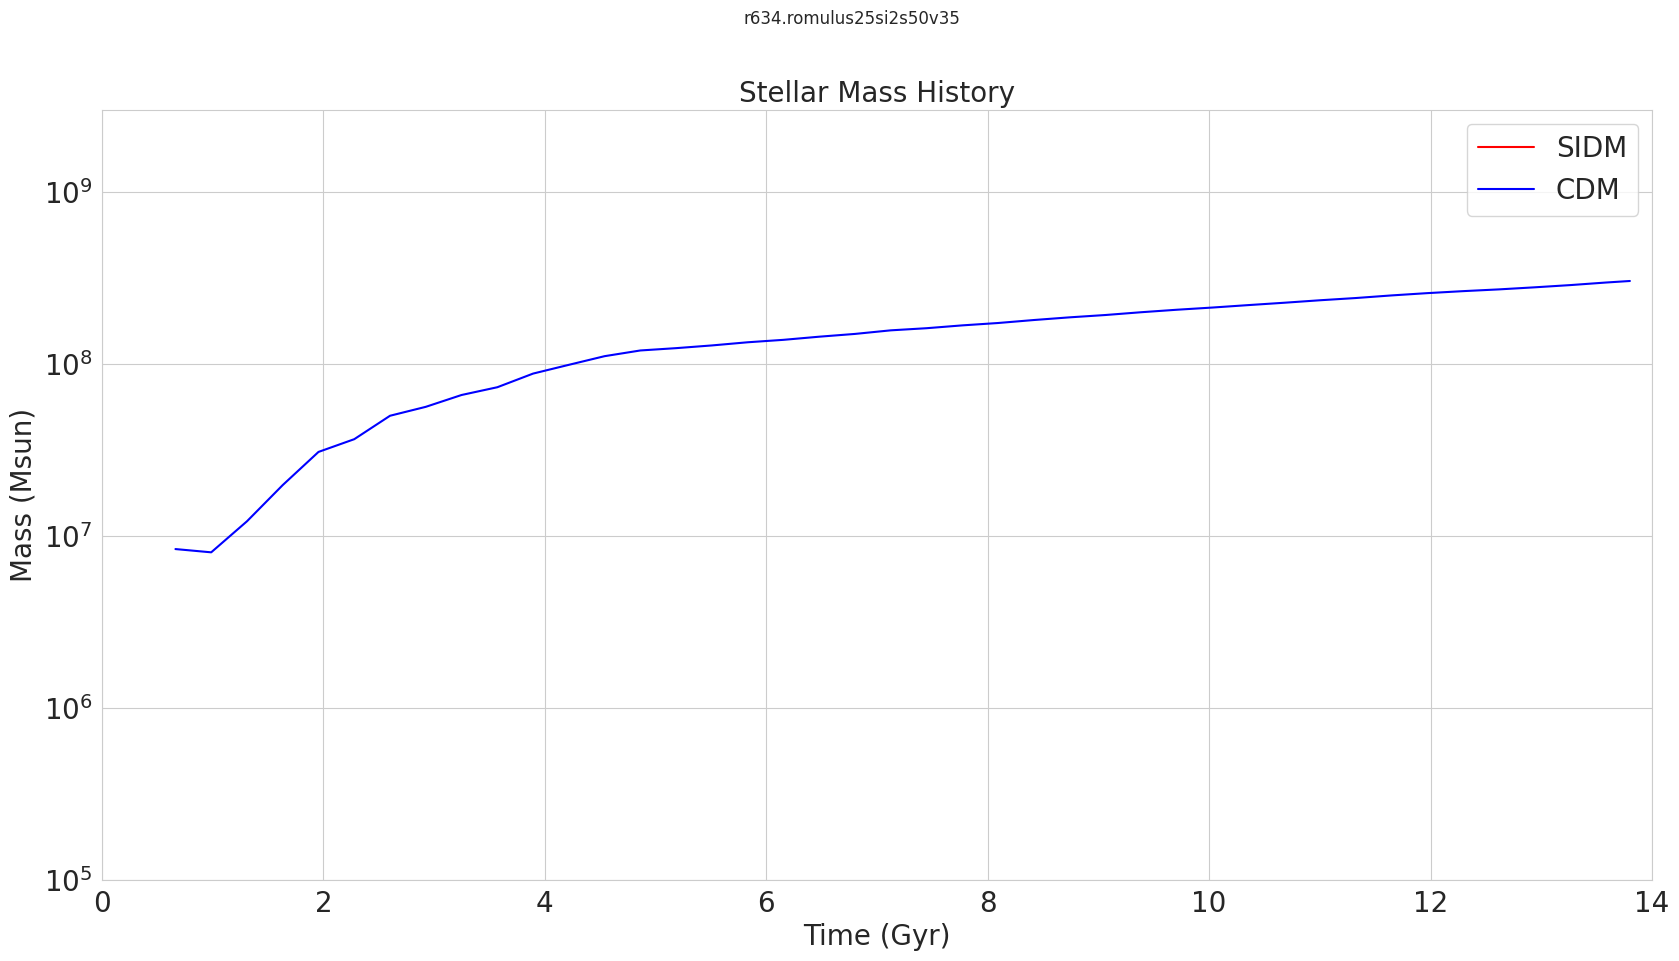

In [45]:
def get_simulation_pairs(sims):
    """
    Group simulations into CDM-SIDM pairs based on their IDs.
    Returns a dictionary with simulation ID as key and tuple of (CDM, SIDM) sims as value.
    """
    pairs = {}
    
    # Group simulations by their ID number (e.g., r431, r468, etc.)
    for sim in sims:
        sim_id = sim.basename.split('.')[0]  # Get r431, r468, etc.
        
        if sim_id not in pairs:
            pairs[sim_id] = {'cdm': None, 'sidm': None}
            
        if 'si2s50v35' in sim.basename:
            pairs[sim_id]['sidm'] = sim
        if 'cvdXsec' in sim.basename:
            pairs[sim_id]['sidm'] = sim
        elif '.3072g1HsbBH' in sim.basename:
            pairs[sim_id]['cdm'] = sim
    
    # Filter out incomplete pairs
    return {k: v for k, v in pairs.items() if v['cdm'] and v['sidm']}



def plot_mass_history(SIDMSim,CDMSim,ax,prop = 'stars'):

    
    SIDMHalo = SIDMSim.timesteps[-1].halos[0]
    CDMHalo = CDMSim.timesteps[-1].halos[0]
    #plot finder_star_mass vs time
    #SIDM

    SIDM_masses, times = SIDMHalo.calculate_for_progenitors("M_star","t()")
    #times = sims[0].timesteps[0].time_cascade[::-1][:]
    ax.plot(times, SIDM_masses,color = 'red')
    
    #CDM
    CDM_masses, times = CDMHalo.calculate_for_progenitors("M_star","t()")
    #times = sims[0].timesteps[0].time_cascade[::-1][:]
    ax.plot(times, CDM_masses,color = 'blue')
    ax.set_xlabel('Time (Gyr)')
    ax.set_ylabel('Mass (Msun)')
    ax.set_title('Stellar Mass History')
    
    
    return ax


# get the simulation pairs
pairs = get_simulation_pairs(sims)
#plot the mass history

for pair in pairs.values():
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plot_mass_history(pair['sidm'],pair['cdm'],ax)
    #set y axis to log scale
    ax.set_yscale('log')
    #limit x axis from 2-14 Gyr
    ax.set_xlim(0,14)
    #limit y axis from 1e7 to 3e9
    ax.set_ylim(1e5,3e9)
    fig.suptitle(pair['sidm'].basename)
    
    
#add dummy legend 
ax.plot([],[],label = 'SIDM',color = 'red')
ax.plot([],[],label = 'CDM',color = 'blue')
ax.legend(fontsize = 20)
#increase font size of axis labels, ticks and title
ax.tick_params(axis='both', which='major', labelsize=20)
ax.title.set_size(20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()


    
    
    

    
    
    
    
    
    
    
    
    